In [1]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果')

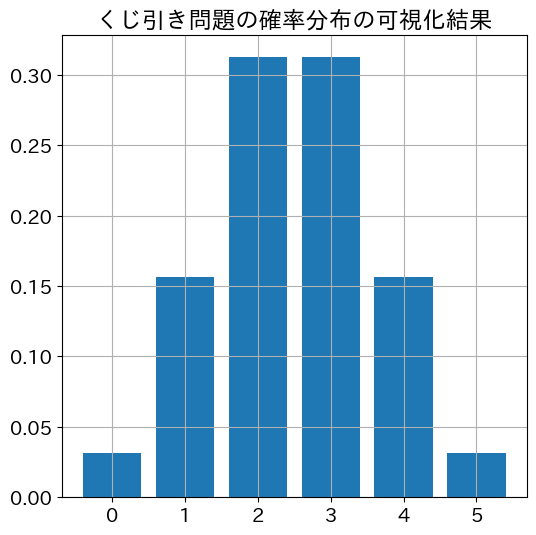

In [2]:
from scipy.special import comb  # comb(n, k) は二項係数 C(n, k) = nCk を計算する関数。

# くじ引きの「何通りあるか」という組合せの数を与える。

n = 5  # 試行回数 n を 5 回とする設定。
# ここでは「くじを 5 回引く」など、成功/失敗の 2 値事象が 5 回起こる状況を想定している。

x = range(n + 1)  # 取りうる成功回数 x = 0, 1, 2, 3, 4, 5 を表す。
# 離散確率変数 X ~ Binomial(n=5, p=1/2) の「値の候補」に対応する。

y = [comb(n, i) / 2**n for i in x]
# comb(n, i) は「n 回の試行のうち i 回成功する並び方の数」= 組合せの数 C(n, i) を表す。
# くじ引き問題で「当たり or ハズレ」が等確率 (p = 1/2) で起こると仮定すると、
# 各試行列（当たり/ハズレの並び）の起こりやすさは (1/2)^n で一定になる。
# よって「i 回成功する確率」は
#   P(X = i) = C(n, i) * (1/2)^i * (1/2)^(n-i) = C(n, i) / 2^n
# となる。これは p = 1/2 の二項分布 Binomial(n=5, p=1/2) の確率質量関数に他ならない。
# ここではその確率 P(X = i) を y に格納している。

plt.bar(x, y)
# x 軸に成功回数 i（0〜5）、y 軸にその確率 P(X = i) をとった棒グラフを描画している。
# これは「5 回くじを引いたときに当たりが何回出るか」の確率分布（二項分布）の形を
# 視覚的に理解するための可視化である。

plt.title("くじ引き問題の確率分布の可視化結果")
# グラフタイトルを設定することで、「くじ引き問題」に対応する確率分布であることを明示している。

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果(n=1000)')

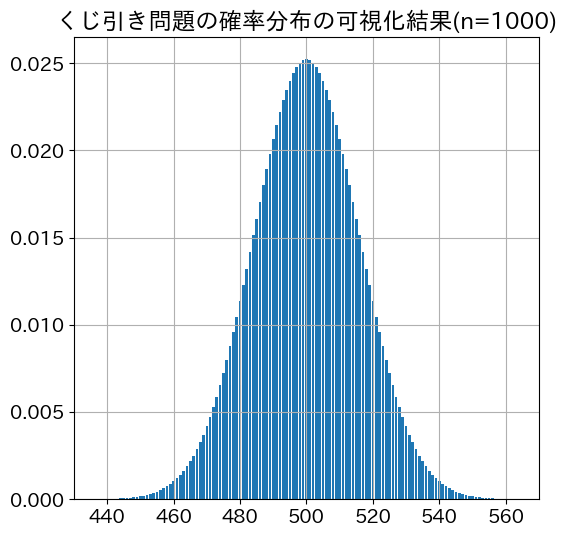

In [3]:
from scipy.special import comb  # comb(n, k) は二項係数 C(n, k) = nCk を計算する関数。

# ここでは「1000 回の試行のうち i 回成功する並び方の数」を表す。

n = 1000  # 試行回数 n を 1000 回に設定。
# 例えば「当たり / ハズレが等確率で起こるくじを 1000 回引く」といった状況を想定している。

x = range(n + 1)  # 成功回数 X が取りうる値の集合 {0, 1, ..., 1000} を生成。
# 離散確率変数 X ~ Binomial(n=1000, p=1/2) の「値の候補」に対応する。

y = [comb(n, i) / 2**n for i in x]
# comb(n, i) は「n 回の試行のうち i 回成功する並び方の数」= 二項係数 C(n, i) を表す。
# くじ引きが各回で独立かつ当たり/ハズレが等確率 p = 1/2 で起こると仮定すると、
# 各「並び方」（具体的な当たり・ハズレの列）は (1/2)^n の確率で起こる。
# よって「ちょうど i 回成功する」確率は
#   P(X = i) = C(n, i) * (1/2)^i * (1/2)^(n-i) = C(n, i) / 2^n
# となる。これは二項分布 Binomial(n=1000, p=1/2) の確率質量関数 (PMF) をそのまま実装した式になっている。
# n が 1000 と大きくなったことで、この二項分布は中心極限定理により
# 近似的に正規分布 N(μ = np, σ^2 = np(1-p)) ≒ N(500, 250) に近い形状を持つことが理論的に知られている。

plt.bar(x, y)
# x 軸に成功回数 i（0〜1000）、y 軸にその確率 P(X = i) をとった棒グラフを描画する。
# n が大きいため、本来の棒グラフは非常に細かい「ほぼ連続的な山」のような形になる。
# これは大数の法則や中心極限定理の結果として、
# 「多くの独立試行の和が正規分布に近づく」という現象を視覚的に確認できる例になっている。

plt.xlim((430, 570))
# x 軸の表示範囲を [430, 570] に制限している。
# 二項分布 Binomial(1000, 1/2) の平均は μ = np = 500、
# 分散は σ^2 = np(1-p) = 250、標準偏差は σ ≒ 15.81 なので、
# 430〜570 という範囲はおおよそ μ ± 4.4σ 程度の「中心付近」を拡大して見ていることに対応する。
# これにより、分布の「山」の形（正規分布に似たベル型）を詳細に観察することができる。

plt.title("くじ引き問題の確率分布の可視化結果(n=1000)")
# グラフタイトルとして「くじ引き問題の確率分布 (n=1000)」であることを明示している。
# 理論的には、これは 1000 回のベルヌーイ試行（当たり/ハズレ、p=1/2）に対する
# 二項分布 Binomial(1000, 1/2) の PMF をプロットしたものであり、
# n を大きくしたときに二項分布が正規分布に近似される、という中心極限定理の具体例としても解釈できる。